In [1]:
import os 
from general_plot import *

model_name = model_name_list[1] 


In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11]
u_random: [   1    4   15   51  153  427 1127 2858 2853 2859 2857 2856 2854 2862
 2855 2852 2860 2861 7033 7030]


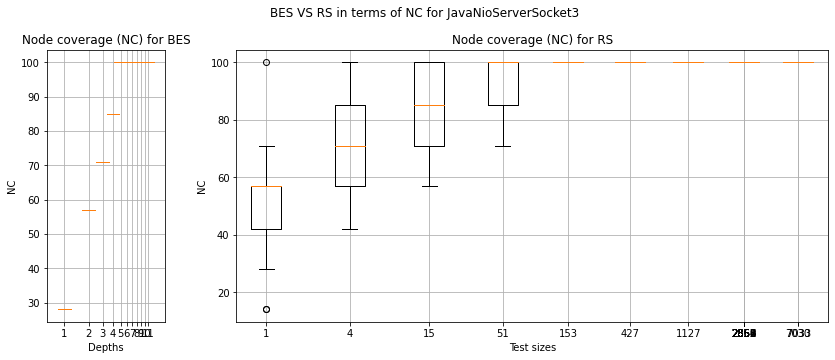

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
map_bes= {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'title': 'Node coverage (NC) for BES',
    'x_label': 'Depths',
    'y_label': 'NC',
    'width_ratio': 1,
    'distance_to_figures': 1
}

map_rand = {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),

    'title': 'Node coverage (NC) for RS',
    'x_label': 'Test sizes',
    'y_label': 'NC',
    'width_ratio': 5
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, map_bes, map_rand)
    

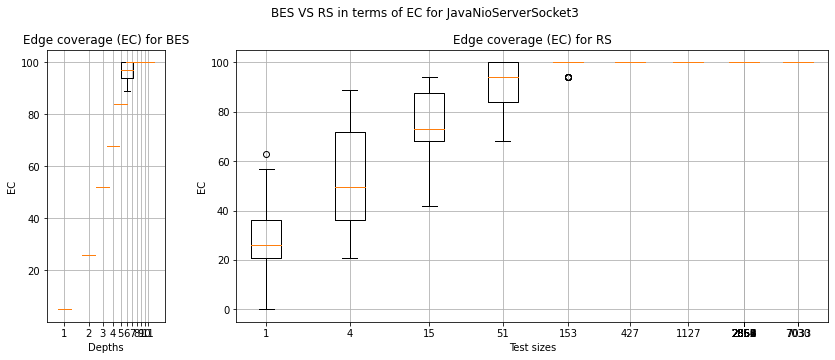

In [3]:
# ec 
coverage = 'EC'
map_bes['title'] = f'Edge coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Edge coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, map_bes, map_rand)



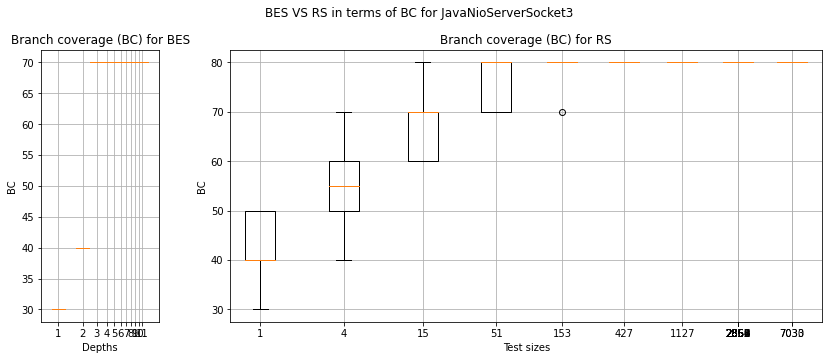

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
map_bes['title'] = f'Branch coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Branch coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

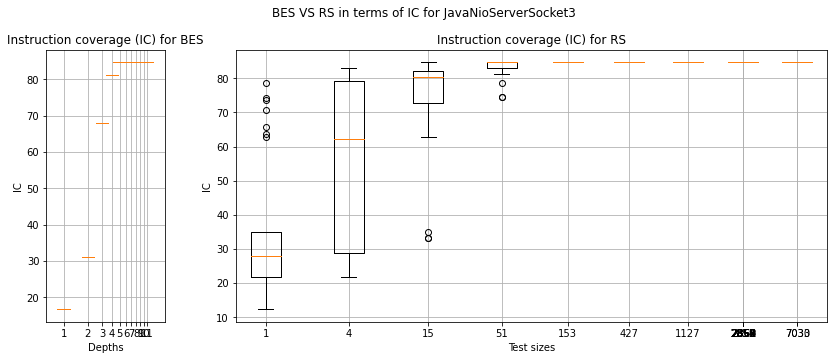

In [5]:
# ic
coverage = 'IC'
map_bes['title'] = f'Instruction coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Instruction coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [51]
depth 5 --> [153]
depth 6 --> [427]
depth 7 --> [1127]
depth 8 --> [2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862]
depth 9 --> [7040, 7044, 7023, 7024, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7038, 7039]
depth 10 --> [16992, 16994, 16995, 16996, 16998, 16999, 17000, 17001, 17003, 17004, 17005, 16976, 17009, 16977, 16981, 16984, 16985, 16986, 16989, 16990]
depth 11 --> [40579, 40581, 40582, 40583, 40585, 40586, 40587, 40589, 40590, 40595, 40598, 40605, 40612, 40551, 40559, 40560, 40561, 40562, 40563, 40565, 40566, 40570, 40571, 40572, 40573]


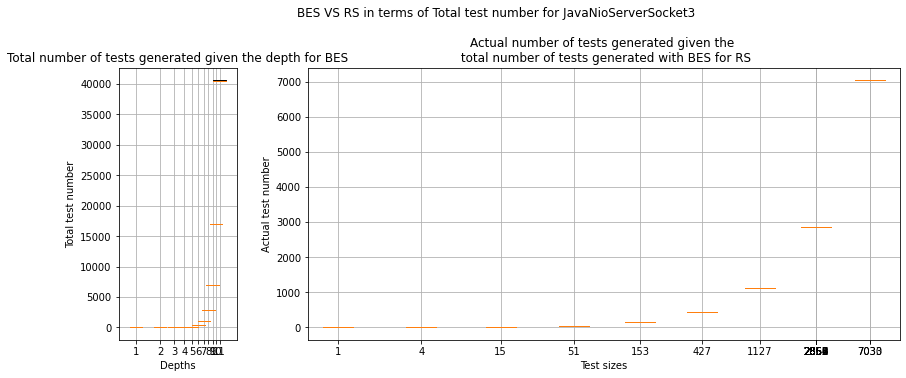

In [6]:
# total_test
creteria = 'total_tests'
map_bes['title'] = f'Total number of tests generated given the depth for BES'
map_bes['y_label'] = 'Total test number'
# 'width_ratio': 1
map_bes['distance_to_figures'] = 1.05

map_rand['title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
map_rand['y_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



depth 1 --> [0.8437910079956055, 1.2317421436309814, 1.2458319664001465, 1.4049019813537598, 1.360745906829834, 1.286090850830078, 1.3268380165100098, 1.1576809883117676, 1.3648531436920166, 1.3230409622192385, 1.244352102279663, 1.2427232265472412, 1.3153679370880127, 1.255141019821167, 1.2649400234222412, 1.3219866752624512, 1.4907629489898682, 1.4317677021026611, 1.420098066329956, 1.5207529067993164, 1.490549087524414, 1.464684009552002, 1.3086709976196291, 1.3601319789886477, 1.3350610733032229, 1.4602518081665041, 1.5129969120025637, 1.5030310153961182, 1.5734949111938477, 1.450610876083374, 1.3141100406646729, 1.3044888973236084, 1.2147808074951172, 1.1606829166412354, 1.406728982925415, 1.4311370849609375, 1.5063109397888184, 1.4860789775848389, 1.4596610069274902, 1.4941580295562744, 1.475675106048584, 1.446990966796875, 1.544739007949829, 1.4872040748596191, 1.4770886898040771, 1.4210660457611084, 1.4346489906311035, 1.5349609851837158, 1.4617030620574951, 1.5730178356170654,

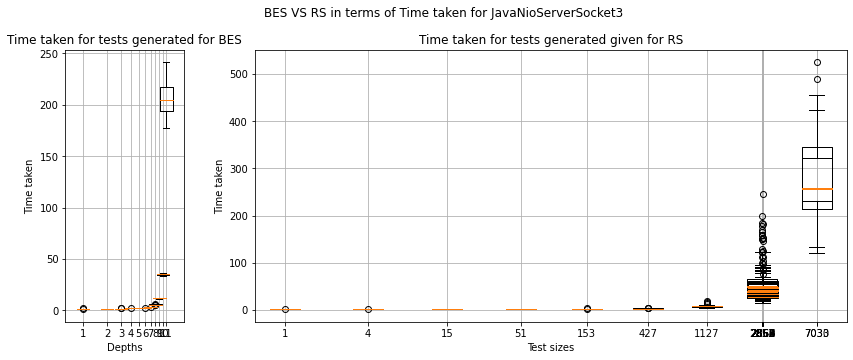

In [7]:
# time_taken
creteria = 'time_taken'
map_bes['title'] = f'Time taken for tests generated for BES'
map_bes['y_label'] = 'Time taken'
map_bes['distance_to_figures'] = 1

map_rand['title'] = f'Time taken for tests generated given for RS'
map_rand['y_label'] = 'Time taken'
map_rand['width_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11 12]
u_random: [   1    4   15   49  140  364  879 2009 2001 2002 2004 2003 2000 2006
 1999 2008 4387 4391 4386 4394 4388 4384 4385 4393 4376 4378 4380 4389
 4392 4377 4382 4401]


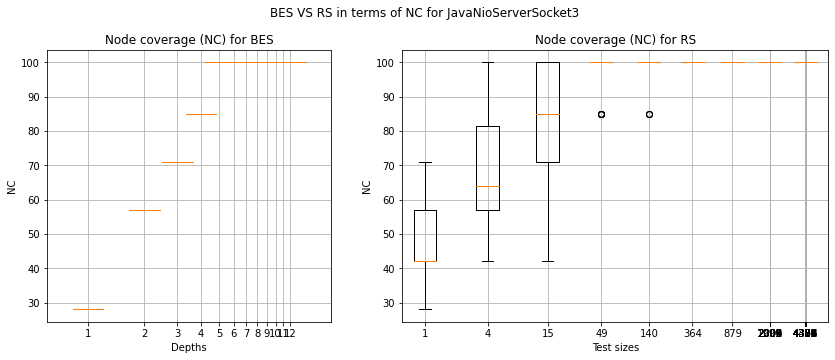

In [8]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
map_bes= {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'title': 'Node coverage (NC) for BES',
    'x_label': 'Depths',
    'y_label': 'NC',
    'width_ratio': 1,
    'distance_to_figures':  1
}

map_rand = {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),

    'title': 'Node coverage (NC) for RS',
    'x_label': 'Test sizes',
    'y_label': 'NC',
    'width_ratio': 1.5
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, map_bes, map_rand)
    

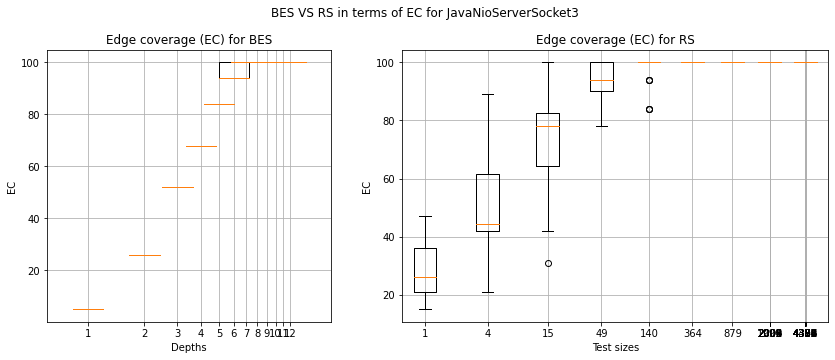

In [9]:
# ec 
coverage = 'EC'
map_bes['title'] = f'Edge coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Edge coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, map_bes, map_rand)



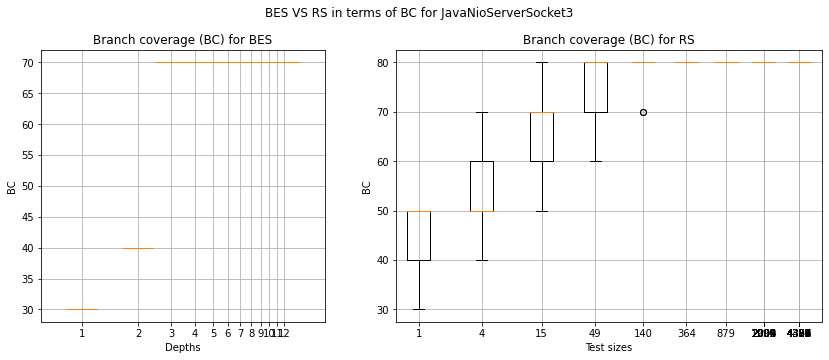

In [10]:
# bc
coverage = 'BC'  #TODO here bc are the same
map_bes['title'] = f'Branch coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Branch coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

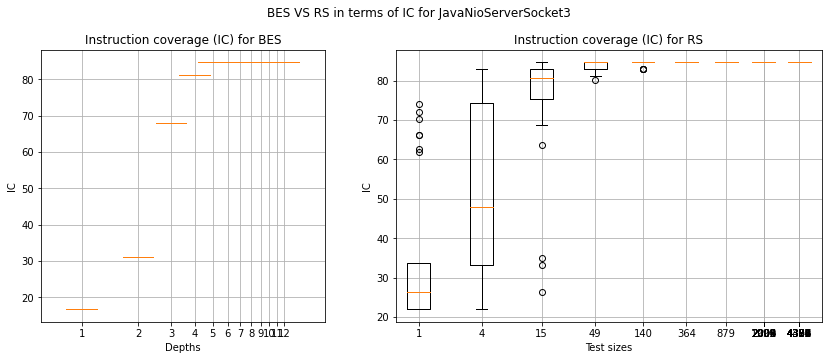

In [11]:
# ic
coverage = 'IC'
map_bes['title'] = f'Instruction coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Instruction coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [49]
depth 5 --> [140]
depth 6 --> [364]
depth 7 --> [879]
depth 8 --> [1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009]
depth 9 --> [4384, 4385, 4386, 4387, 4388, 4389, 4391, 4392, 4393, 4394, 4401, 4376, 4377, 4378, 4380, 4382]
depth 10 --> [9350, 9354, 9355, 9356, 9357, 9358, 9359, 9361, 9363, 9364, 9366, 9368, 9372, 9374, 9376, 9381, 9383, 9384, 9385, 9390, 9394]
depth 11 --> [19781, 19785, 19789, 19791, 19794, 19795, 19797, 19798, 19800, 19802, 19803, 19804, 19805, 19808, 19810, 19812, 19815, 19822, 19823, 19825, 19827, 19835]
depth 12 --> [41867, 41874, 41882, 41884, 41887, 41889, 41890, 41891, 41895, 41899, 41902, 41903, 41905, 41908, 41909, 41910, 41924, 41934, 41935, 41936, 41941, 41839]


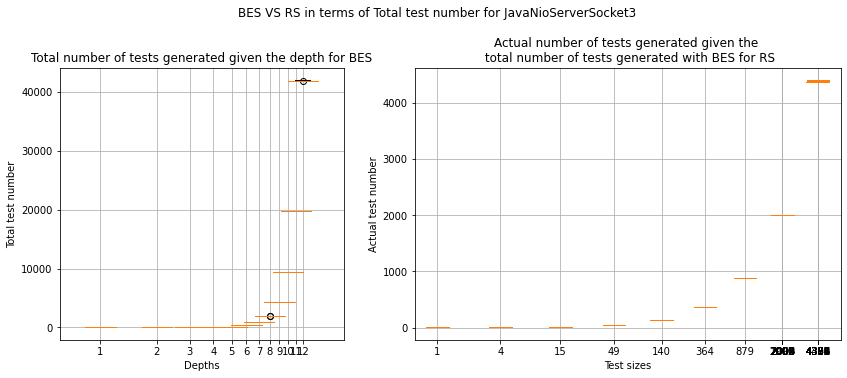

In [12]:
# total_test
creteria = 'total_tests'
map_bes['title'] = f'Total number of tests generated given the depth for BES'
map_bes['y_label'] = 'Total test number'
# 'width_ratio': 1
map_bes['distance_to_figures'] = 1.05

map_rand['title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
map_rand['y_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



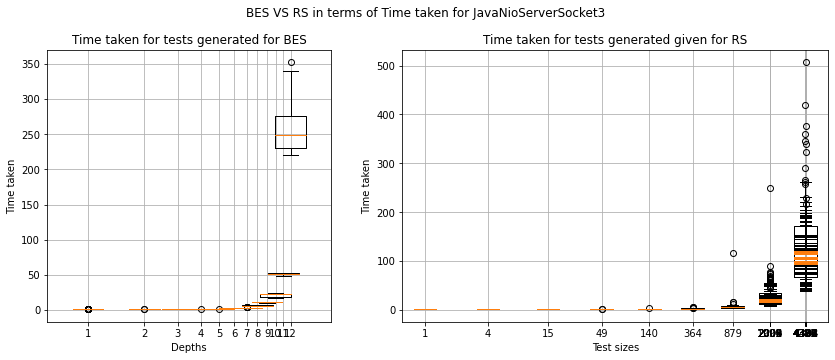

In [13]:
# time_taken
creteria = 'time_taken'
map_bes['title'] = f'Time taken for tests generated for BES'
map_bes['y_label'] = 'Time taken'
map_bes['distance_to_figures'] = 1

map_rand['title'] = f'Time taken for tests generated given for RS'
map_rand['y_label'] = 'Time taken'
map_rand['width_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



In [14]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





